In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action="ignore")

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('D:\\ML\\May-2021\\HousingPrices-xgBoost\\house-prices-advanced-regression-techniques\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\ML\May-2021\HousingPrices-xgBoost\house-prices-advanced-regression-techniques\data_description.txt
D:\ML\May-2021\HousingPrices-xgBoost\house-prices-advanced-regression-techniques\sample_submission.csv
D:\ML\May-2021\HousingPrices-xgBoost\house-prices-advanced-regression-techniques\test.csv
D:\ML\May-2021\HousingPrices-xgBoost\house-prices-advanced-regression-techniques\train.csv


In [2]:
os.chdir("D:\\ML\\May-2021\\HousingPrices-xgBoost\\house-prices-advanced-regression-techniques\\")
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#dealing with null values in the train and test dataset
null = train.isna().sum().sort_values(ascending = True)
null_2 = test.isna().sum().sort_values(ascending = True)
null_values = pd.concat([null, null_2], keys = ['train null', 'test null'], axis = 1)
null_values.head(40)

,train null,test null
Id,0,0.0
TotalBsmtSF,0,1.0
Heating,0,0.0
SaleCondition,0,0.0
CentralAir,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
LowQualFinSF,0,0.0
GrLivArea,0,0.0
BsmtFullBath,0,2.0


In [5]:
#Lot Frontage
data = [train, test]
for dataset in data:
    x = dataset.iloc[:, 3].values
    x = x.reshape(-1,1)
    imputer  = SimpleImputer(strategy = 'mean', missing_values = np.nan)
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    dataset.iloc[:, 3] = x

In [6]:
#Alley
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,6].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 6] = x    

In [7]:
# BsmtCond
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,31].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 31] = x 

In [8]:
#BsmtExposure
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,32].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 32] = x 

In [9]:
#BsmtFinType1
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,33].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 33] = x 

In [10]:
#BsmtFinType2
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,35].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 35] = x 

In [11]:
#BsmtQual
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,30].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 30] = x 

In [12]:
#Fence
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,73].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 73] = x 

In [13]:
#FireplaceQu
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,57].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 57] = x 

In [14]:
#GarageCond
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,64].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 64] = x 

In [15]:
#GarageFinish
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,60].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 60] = x 

In [16]:
#GarageQual
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,63].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 63] = x 

In [17]:
#GarageType
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,58].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 58] = x 

In [18]:
#GarageYrBit
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,59].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 59] = x 

In [19]:
null_values.tail(40)

,train null,test null
Street,0,0.0
LotArea,0,0.0
MSZoning,0,4.0
BsmtFinSF1,0,1.0
Condition2,0,0.0
BldgType,0,0.0
HouseStyle,0,0.0
OverallQual,0,0.0
OverallCond,0,0.0
LotConfig,0,0.0


In [20]:
#MiscFeature
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,74].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 74] = x 

In [21]:
#PoolQC
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,72].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 72] = x 

In [22]:
#MasVnrType
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,25].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 25] = x 

In [23]:
#MasVnrArea
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,26].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'mean', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 26] = x 

In [24]:
#Remaining null values 
null_3 = train.isna().sum().sort_values(ascending = True)
null_4 = test.isna().sum().sort_values(ascending = True)
null_values_1 = pd.concat([null_3, null_4], keys = ['train null', 'test null'], axis = 1)
null_values_1.head(40)

,train null,test null
Id,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,2.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,1.0
KitchenAbvGr,0,0.0
GarageYrBlt,0,0.0
BedroomAbvGr,0,0.0


In [25]:
null_values_1.tail(40)

,train null,test null
OverallQual,0,0.0
HouseStyle,0,0.0
BldgType,0,0.0
Condition2,0,0.0
Condition1,0,0.0
Neighborhood,0,0.0
LandSlope,0,0.0
LotConfig,0,0.0
Utilities,0,2.0
LandContour,0,0.0


In [26]:
#Drop remaining null rows in train set
train = train.dropna(axis = 0)
# test = test.fillna(0, axis = 0)

In [27]:
#imputing remaining test set null values
x = test.iloc[:,39].values
x = x.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(x)
x = impute.transform(x)
dataset.iloc[:, 39] = x 

In [28]:
# #imputing remaining test set null values
# b = test.iloc[:,80].values
# b = b.reshape(-1,1)
# impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
# impute = impute.fit(b)
# b = impute.transform(b)
# dataset.iloc[:, 80] = b 

In [29]:
#imputing remaining test set null values
c = test.iloc[:,55].values
c = c.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(c)
c = impute.transform(c)
dataset.iloc[:, 55] = c 

In [30]:
#imputing remaining test set null values
d = test.iloc[:,2].values
d = d.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(d)
d = impute.transform(d)
dataset.iloc[:, 2] = d 

In [31]:
#imputing remaining test set null values
e = test.iloc[:,-18].values
e = e.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(e)
e = impute.transform(e)
dataset.iloc[:, -18] = e 

In [32]:
#imputing remaining test set null values
f = test.iloc[:,-19].values
f = f.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(f)
f = impute.transform(f)
dataset.iloc[:, -19] = f 

In [33]:
#imputing remaining test set null values
g = test.iloc[:,23].values
g = g.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(g)
g = impute.transform(g)
dataset.iloc[:, 23] = g 

In [34]:
#imputing remaining test set null values
h = test.iloc[:,24].values
h = h.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(h)
h = impute.transform(h)
dataset.iloc[:, 24] = h 

In [35]:
#imputing remaining test set null values
i = test.iloc[:,57].values
i = i.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(i)
i = impute.transform(i)
dataset.iloc[:, 57] = i 

In [36]:
#imputing remaining test set null values
j = test.iloc[:,38].values
j = j.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(j)
j = impute.transform(j)
dataset.iloc[:, 38] = j

In [37]:
#imputing remaining test set null values
k = test.iloc[:,37].values
k = k.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(k)
k = impute.transform(k)
dataset.iloc[:, 37] = k 

In [38]:
#imputing remaining test set null values
a = test.iloc[:,9].values
a = a.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(a)
a = impute.transform(a)
dataset.iloc[:, 9] = a 

In [39]:
#imputing remaining test set null values
n = test.iloc[:,35].values
n = n.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(n)
n = impute.transform(n)
dataset.iloc[:, 35] = n 

In [40]:
#imputing remaining test set null values
l = test.iloc[:,49].values
l = l.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(l)
l = impute.transform(l)
dataset.iloc[:, 49] = l 

In [41]:
#imputing remaining test set null values
m = test.iloc[:,48].values
m = m.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(m)
m = impute.transform(m)
dataset.iloc[:, 48] = m 

In [42]:
#imputing remaining test set null values
l = test.iloc[:,-2].values
l = l.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(l)
l = impute.transform(l)
dataset.iloc[:, -2] = l 

In [43]:
#imputing remaining test set null values
l = test.iloc[:,-27].values
l = l.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(l)
l = impute.transform(l)
dataset.iloc[:, -27] = l 

In [44]:
#imputing remaining test set null values
l = test.iloc[:,34].values
l = l.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(l)
l = impute.transform(l)
dataset.iloc[:, 34] = l 

In [45]:
#imputing remaining test set null values
l = test.iloc[:,36].values
l = l.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(l)
l = impute.transform(l)
dataset.iloc[:, 36] = l 

In [46]:
#imputing remaining test set null values
l = test.iloc[:,47].values
l = l.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(l)
l = impute.transform(l)
dataset.iloc[:, 47] = l 

In [47]:
#imputing remaining test set null values
l = test.iloc[:,49].values
l = l.reshape(-1,1)
impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
impute = impute.fit(l)
l = impute.transform(l)
dataset.iloc[:, 49] = l 

In [48]:
#Remaining null values 
test.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Length: 80, dtype: bool

In [49]:
#Drop the ID colum
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

<AxesSubplot:>

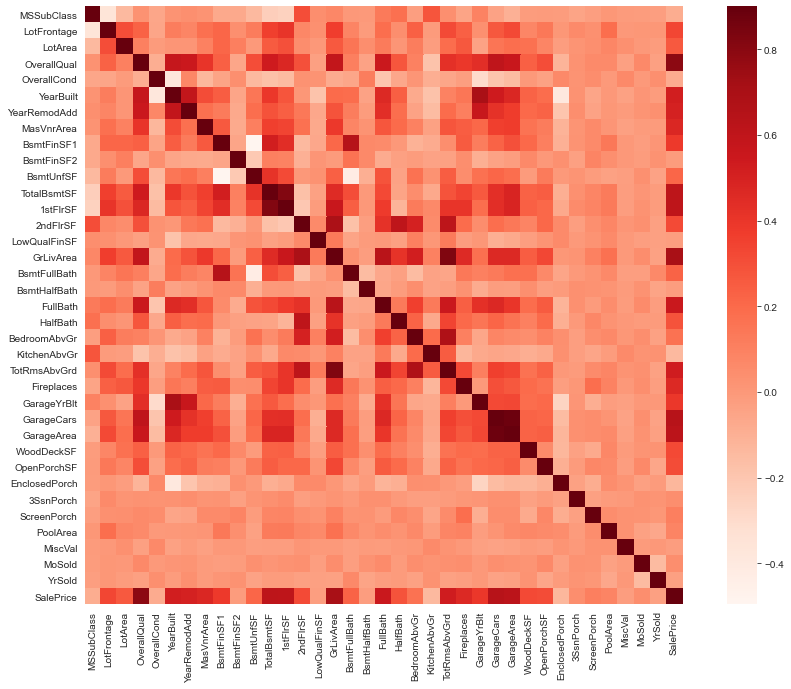

In [50]:
#correlation plot

# Compute correlations
corr = train.corr()

sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(corr, vmax=0.9, cmap="Reds", square=True)

[Text(0.5, 1.0, 'SalePrice distribution')]

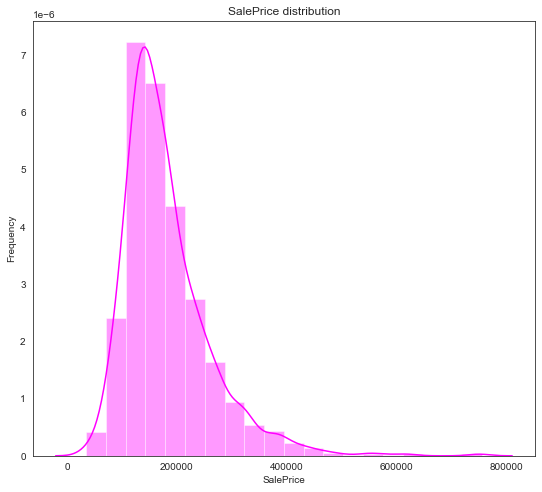

In [51]:
#check for skewness
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(train['SalePrice'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

In [52]:
# log transformation
train["SalePrice"] = np.log1p(train["SalePrice"])

[Text(0.5, 1.0, 'SalePrice distribution')]

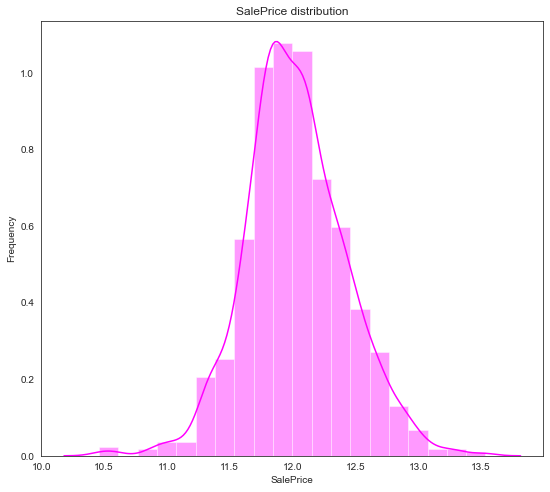

In [53]:
#check for skewness after transformation
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(train['SalePrice'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

In [54]:
#Extracting the independent variables
train_features = train.drop('SalePrice', axis = 1)
train_dependent = train['SalePrice'].reset_index(drop=True)
test_features = test

In [55]:
test_features.shape

(1459, 79)

In [56]:
#Joining the features tables
all_variables = pd.concat([train_features, test_features]).reset_index(drop=True)

In [57]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_variables.columns:
    if all_variables[i].dtype in numeric_dtypes:
        numeric.append(i)

In [58]:
# Find skewed numerical features
skew_features = all_variables[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 26 numerical features with Skew > 0.5 :


MiscVal          21.943434
PoolArea         16.895403
LotArea          12.820198
LowQualFinSF     12.086650
3SsnPorch        11.374072
KitchenAbvGr      4.301402
BsmtFinSF2        4.145323
EnclosedPorch     4.003118
ScreenPorch       3.945898
BsmtHalfBath      3.930795
MasVnrArea        2.611076
OpenPorchSF       2.534720
WoodDeckSF        1.842171
LotFrontage       1.643652
1stFlrSF          1.469476
BsmtFinSF1        1.424989
MSSubClass        1.375926
GrLivArea         1.268956
TotalBsmtSF       1.157691
BsmtUnfSF         0.918867
2ndFlrSF          0.862356
TotRmsAbvGrd      0.758629
Fireplaces        0.733011
HalfBath          0.695616
BsmtFullBath      0.624287
OverallCond       0.569813
BedroomAbvGr      0.326446
GarageArea        0.238896
OverallQual       0.196501
MoSold            0.195442
FullBath          0.168269
YrSold            0.132539
GarageCars       -0.218260
YearRemodAdd     -0.450541
GarageYrBlt      -0.468027
YearBuilt        -0.599445
dtype: float64

In [59]:
# Normalize skewed features
for i in skew_index:
    all_variables[i] = boxcox1p(all_variables[i], boxcox_normmax(all_variables[i] + 1))

In [60]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']

all_variables = logs(all_variables, log_features)

In [61]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log']
all_variables = squares(all_variables, squared_features)


In [62]:
all_variables = pd.get_dummies(all_variables).reset_index(drop=True)
all_variables.shape
# one_hot_encoded_test_predictors = pd.get_dummies(test)
# final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,join='left',axis=1)

(2918, 325)

In [63]:
all_variables.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.494153,13.746899,13.422603,7,3.990577,2003,2003,19.466735,117.892043,0.0,...,0,0,0,1,0,0,0,0,1,0
1,4.247104,15.404229,13.692541,6,5.998233,1976,1976,0.000000,146.853600,0.0,...,0,0,0,1,0,0,0,0,1,0
2,6.494153,14.092719,14.032058,7,3.990577,2001,2002,17.798191,91.601457,0.0,...,0,0,0,1,0,0,0,0,1,0
3,6.856471,13.152107,13.681437,7,3.990577,1915,1970,0.000000,52.789068,0.0,...,0,0,0,1,1,0,0,0,0,0
4,6.494153,15.818940,14.547930,8,3.990577,2000,2000,25.453975,112.074240,0.0,...,0,0,0,1,0,0,0,0,1,0


In [64]:
#Restracture back to original 2 datasets
X = all_variables.iloc[:len(train_dependent), :]
X_test = all_variables.iloc[len(train_dependent):, :]
X.shape, train_dependent.shape, X_test.shape

((1459, 325), (1459,), (1459, 325))

In [65]:
# Fitting Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, train_dependent.ravel())

RandomForestRegressor(n_estimators=300, random_state=0)

In [66]:
#cross validation score
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(regressor, X, train_dependent,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 0.09561080688860803


In [68]:
#!pip install xgboost

In [69]:
# XGBRegressor
from xgboost import XGBRegressor
regressor_2 = XGBRegressor(n_estimators = 500, learning_rate = 0.05)
# Fit the model
regressor_2 = regressor_2.fit(X, train_dependent, verbose = False)

# Get predictions
# pred_2 = regressor_2.predict(X_test) 

In [70]:
#cross validation score
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
regressor_2 = XGBRegressor(n_estimators = 500, learning_rate = 0.05)
scores = -1 * cross_val_score(regressor_2, X, train_dependent,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 0.08445266758959484


In [71]:
# Predicting results (with XGB)
regressor_2 = regressor_2.fit(X, train_dependent, verbose = False)
Y_pred = regressor_2.predict(X_test)

In [72]:
Y_pred.shape

(1459,)

In [74]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(Y_pred))

In [75]:
# Fix outlier predictions
q1 = submission['SalePrice'].quantile(0.05)
q2 = submission['SalePrice'].quantile(0.95)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission_1.csv", index=False)

In [76]:
# Scale predictions
submission['SalePrice'] *= 1.001619
submission.to_csv("submission_2.csv", index=False)